# NMTLR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions

#from pycox.datasets import metabric
from pycox.models import MTLR
from pycox.evaluation import EvalSurv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from pycox.models.utils import pad_col

In [2]:
 def analyze_file(data):
    print("Dataset:")
    display(data)
    
    # Output the shape of the dataset
    print("\nShape of the dataset (rows, columns):")
    print(data.shape)
    
    # Output the data types of each column
    print("\nData types of each column:")
    print(data.dtypes)
    
    # Output the count of missing values in each column
    print("\nCount of missing values in each column:")
    print(data.isnull().sum())

In [3]:
np.random.seed(1234)
_ = torch.manual_seed(123)

# Dataset

In [4]:
data = pd.read_csv('/Users/simrantanwar/Desktop/College/DDP/survival_analysis/data/genomics_brain_16_09_24.csv')
analyze_file(data)

Dataset:


,Unnamed: 0,Patient ID,LASP1,HOXA11,CREBBP,ETV1,GAS7,CD79B,PAX7,BTK,...,CUX1,PIERCE2,SRGAP2,NCOA4,SSX4,TAF15,MLLT6,DUX4L1,OS,OS.time
0,0,TCGA-02-0047,8.923858,3.526361,8.244071,8.900549,9.184510,3.555348,2.302585,6.255750,...,8.282483,4.127134,8.053251,9.012621,0.0,8.319474,8.334952,0.0,1.0,448.0
1,1,TCGA-02-0055,8.460199,3.970292,7.816014,7.650645,7.964156,2.890372,1.609438,6.614726,...,8.368693,4.276666,7.794823,8.727130,0.0,8.235361,7.855157,0.0,1.0,76.0
2,2,TCGA-02-2483,9.164296,4.682131,8.572628,10.186973,8.340217,2.944439,1.609438,6.146329,...,8.606302,3.931826,8.222554,9.270965,0.0,8.883779,8.491260,0.0,0.0,466.0
3,3,TCGA-02-2485,9.133675,3.970292,8.474077,9.155250,6.938284,2.564949,1.791759,5.780744,...,8.629629,4.369448,8.235361,8.687779,0.0,9.019301,8.461046,0.0,0.0,470.0
4,4,TCGA-02-2486,8.626765,3.526361,7.090910,6.838405,8.690642,2.995732,0.693147,7.329750,...,8.512382,5.793014,7.963460,8.760139,0.0,8.525161,8.006034,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,8698,TCGA-WY-A85A,9.093245,1.791759,8.631414,10.231928,7.642524,0.693147,2.397895,5.602119,...,8.810460,3.891820,7.765993,8.910586,0.0,8.927977,9.006509,0.0,0.0,1320.0
661,8699,TCGA-WY-A85B,8.977778,2.397895,8.905037,10.492523,7.574558,2.484907,1.386294,6.572283,...,9.015906,4.234107,7.955074,9.328568,0.0,9.316770,9.229849,0.0,0.0,1393.0
662,8700,TCGA-WY-A85C,8.820552,6.282267,9.278466,9.983315,7.007601,1.945910,1.945910,5.730100,...,9.177714,3.610918,8.107720,9.145909,0.0,9.151757,9.219696,0.0,0.0,1426.0
663,8701,TCGA-WY-A85D,8.793612,0.000000,8.634443,8.751316,7.677400,2.197225,0.000000,5.983936,...,8.861208,3.637586,7.914983,8.731498,0.0,9.364005,8.856234,0.0,0.0,1147.0



Shape of the dataset (rows, columns):
(665, 752)

Data types of each column:
Unnamed: 0      int64
Patient ID     object
LASP1         float64
HOXA11        float64
CREBBP        float64
               ...   
TAF15         float64
MLLT6         float64
DUX4L1        float64
OS            float64
OS.time       float64
Length: 752, dtype: object

Count of missing values in each column:
Unnamed: 0    0
Patient ID    0
LASP1         0
HOXA11        0
CREBBP        0
             ..
TAF15         0
MLLT6         0
DUX4L1        0
OS            0
OS.time       0
Length: 752, dtype: int64


In [5]:
df = data.drop(columns=['Unnamed: 0','Patient ID'], axis=1)
analyze_file(df)

Dataset:


,LASP1,HOXA11,CREBBP,ETV1,GAS7,CD79B,PAX7,BTK,BRCA1,WAS,...,CUX1,PIERCE2,SRGAP2,NCOA4,SSX4,TAF15,MLLT6,DUX4L1,OS,OS.time
0,8.923858,3.526361,8.244071,8.900549,9.184510,3.555348,2.302585,6.255750,6.257668,7.026427,...,8.282483,4.127134,8.053251,9.012621,0.0,8.319474,8.334952,0.0,1.0,448.0
1,8.460199,3.970292,7.816014,7.650645,7.964156,2.890372,1.609438,6.614726,5.605802,7.315884,...,8.368693,4.276666,7.794823,8.727130,0.0,8.235361,7.855157,0.0,1.0,76.0
2,9.164296,4.682131,8.572628,10.186973,8.340217,2.944439,1.609438,6.146329,6.932448,6.867974,...,8.606302,3.931826,8.222554,9.270965,0.0,8.883779,8.491260,0.0,0.0,466.0
3,9.133675,3.970292,8.474077,9.155250,6.938284,2.564949,1.791759,5.780744,6.970730,6.242223,...,8.629629,4.369448,8.235361,8.687779,0.0,9.019301,8.461046,0.0,0.0,470.0
4,8.626765,3.526361,7.090910,6.838405,8.690642,2.995732,0.693147,7.329750,5.683580,7.600902,...,8.512382,5.793014,7.963460,8.760139,0.0,8.525161,8.006034,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,9.093245,1.791759,8.631414,10.231928,7.642524,0.693147,2.397895,5.602119,5.849325,6.272877,...,8.810460,3.891820,7.765993,8.910586,0.0,8.927977,9.006509,0.0,0.0,1320.0
661,8.977778,2.397895,8.905037,10.492523,7.574558,2.484907,1.386294,6.572283,6.376727,7.059618,...,9.015906,4.234107,7.955074,9.328568,0.0,9.316770,9.229849,0.0,0.0,1393.0
662,8.820552,6.282267,9.278466,9.983315,7.007601,1.945910,1.945910,5.730100,6.347389,6.428105,...,9.177714,3.610918,8.107720,9.145909,0.0,9.151757,9.219696,0.0,0.0,1426.0
663,8.793612,0.000000,8.634443,8.751316,7.677400,2.197225,0.000000,5.983936,5.796058,6.858565,...,8.861208,3.637586,7.914983,8.731498,0.0,9.364005,8.856234,0.0,0.0,1147.0



Shape of the dataset (rows, columns):
(665, 750)

Data types of each column:
LASP1      float64
HOXA11     float64
CREBBP     float64
ETV1       float64
GAS7       float64
            ...   
TAF15      float64
MLLT6      float64
DUX4L1     float64
OS         float64
OS.time    float64
Length: 750, dtype: object

Count of missing values in each column:
LASP1      0
HOXA11     0
CREBBP     0
ETV1       0
GAS7       0
          ..
TAF15      0
MLLT6      0
DUX4L1     0
OS         0
OS.time    0
Length: 750, dtype: int64


In [6]:
# Create a test set by sampling 20% of the training data
df_test = df.sample(frac=0.2)

# Remove the test set from the original training data
df_train = df.drop(df_test.index)

# Create a validation set by sampling 20% of the remaining training data
df_val = df_train.sample(frac=0.2)

# Remove the validation set from the remaining training data
df_train = df_train.drop(df_val.index)


In [7]:
analyze_file(df_train)

Dataset:


,LASP1,HOXA11,CREBBP,ETV1,GAS7,CD79B,PAX7,BTK,BRCA1,WAS,...,CUX1,PIERCE2,SRGAP2,NCOA4,SSX4,TAF15,MLLT6,DUX4L1,OS,OS.time
0,8.923858,3.526361,8.244071,8.900549,9.184510,3.555348,2.302585,6.255750,6.257668,7.026427,...,8.282483,4.127134,8.053251,9.012621,0.0,8.319474,8.334952,0.0,1.0,448.0
1,8.460199,3.970292,7.816014,7.650645,7.964156,2.890372,1.609438,6.614726,5.605802,7.315884,...,8.368693,4.276666,7.794823,8.727130,0.0,8.235361,7.855157,0.0,1.0,76.0
2,9.164296,4.682131,8.572628,10.186973,8.340217,2.944439,1.609438,6.146329,6.932448,6.867974,...,8.606302,3.931826,8.222554,9.270965,0.0,8.883779,8.491260,0.0,0.0,466.0
3,9.133675,3.970292,8.474077,9.155250,6.938284,2.564949,1.791759,5.780744,6.970730,6.242223,...,8.629629,4.369448,8.235361,8.687779,0.0,9.019301,8.461046,0.0,0.0,470.0
4,8.626765,3.526361,7.090910,6.838405,8.690642,2.995732,0.693147,7.329750,5.683580,7.600902,...,8.512382,5.793014,7.963460,8.760139,0.0,8.525161,8.006034,0.0,1.0,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,8.613230,0.000000,8.080856,8.202482,8.379539,3.091042,1.098612,6.602588,6.016157,7.303170,...,8.412499,3.828641,8.547722,8.804025,0.0,9.069122,8.859363,0.0,0.0,1337.0
659,9.247251,5.393628,9.001839,9.529376,10.136463,0.693147,5.241747,5.602119,6.150603,6.220590,...,8.990317,4.882802,8.641886,8.933928,0.0,9.354008,9.263217,0.0,0.0,1213.0
660,9.093245,1.791759,8.631414,10.231928,7.642524,0.693147,2.397895,5.602119,5.849325,6.272877,...,8.810460,3.891820,7.765993,8.910586,0.0,8.927977,9.006509,0.0,0.0,1320.0
661,8.977778,2.397895,8.905037,10.492523,7.574558,2.484907,1.386294,6.572283,6.376727,7.059618,...,9.015906,4.234107,7.955074,9.328568,0.0,9.316770,9.229849,0.0,0.0,1393.0



Shape of the dataset (rows, columns):
(426, 750)

Data types of each column:
LASP1      float64
HOXA11     float64
CREBBP     float64
ETV1       float64
GAS7       float64
            ...   
TAF15      float64
MLLT6      float64
DUX4L1     float64
OS         float64
OS.time    float64
Length: 750, dtype: object

Count of missing values in each column:
LASP1      0
HOXA11     0
CREBBP     0
ETV1       0
GAS7       0
          ..
TAF15      0
MLLT6      0
DUX4L1     0
OS         0
OS.time    0
Length: 750, dtype: int64


# Featrue transform

In [8]:
columns = df.columns.tolist()
cols_standardize = columns[:-2]+columns[-1:]
print(cols_standardize)
#cols_leave = ['type', 'gender','Outcome','tumor_status','OS']

standardize = [([col], StandardScaler()) for col in cols_standardize]
#leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize)

['LASP1', 'HOXA11', 'CREBBP', 'ETV1', 'GAS7', 'CD79B', 'PAX7', 'BTK', 'BRCA1', 'WAS', 'WWTR1', 'CD74', 'BIRC3', 'FAS', 'BCLAF1', 'ANK1', 'RABEP1', 'ZCCHC8', 'CUL3', 'FLT4', 'CDH1', 'CDH10', 'TNC', 'CTNNA1', 'EPHA3', 'PREX2', 'TPR', 'GOPC', 'ROS1', 'TNFRSF17', 'SNX29', 'ELN', 'ARID1B', 'HERPUD1', 'POLQ', 'PIK3CB', 'THRAP3', 'KMT2C', 'PRDM1', 'POLD1', 'CASP8', 'PMS1', 'NTHL1', 'ERBB3', 'SPEN', 'MAP2K4', 'CTNNA2', 'SMARCD1', 'ASPM', 'GOLGA5', 'FGFR2', 'KLF6', 'RHOA', 'ATP2B3', 'CBFB', 'FGFR3', 'TFE3', 'BCL3', 'CLTCL1', 'FSTL3', 'PABPC1', 'TCF3', 'PRKACA', 'TFRC', 'AFF4', 'SMC1A', 'FCGR2B', 'TP63', 'SDHA', 'SMARCE1', 'KDM5A', 'IGF2BP2', 'MAP3K13', 'PICALM', 'EED', 'ARHGEF10L', 'MLH1', 'NT5C2', 'NFKB2', 'FGFR1', 'ARAF', 'N4BP2', 'HOXA9', 'MLLT10', 'PCM1', 'RUNX1T1', 'CDH17', 'CIC', 'DNM2', 'KEAP1', 'HSP90AA1', 'PTPRC', 'ERC1', 'XPO1', 'PALB2', 'KAT6A', 'CYLD', 'FAT1', 'NCOA1', 'BCORL1', 'ATRX', 'MECOM', 'EPS15', 'BAX', 'GNAS', 'CNOT3', 'GNA11', 'FUS', 'CD209', 'FH', 'ESR1', 'EZR', 'MSH2', '

In [9]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

# Label Transforms
The survival methods require individual label transforms, so we have included a proposed label_transform for each method. In this case label_transform is just a shorthand for the class pycox.preprocessing.label_transforms.LabTransDiscreteTime.

The MTLR is a discrete-time method, meaning it requires discretization of the event times to be applied to continuous-time data. We let num_durations define the size of this (equidistant) discretization grid, meaning our network will have num_durations output nodes.

In [10]:
num_durations = 10
labtrans = MTLR.label_transform(num_durations)
get_target = lambda df: (df['OS.time'].values, df['OS'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

In [11]:
type(labtrans)

pycox.preprocessing.label_transforms.LabTransDiscreteTime

# Neural Net
We make a neural net with torch. For simple network structures, we can use the MLPVanilla provided by torchtuples.\
The following net is an MLP with two hidden layers (with 32 nodes each), ReLU activations, and num_nodes output nodes. We also have batch normalization and dropout between the layers.

In [12]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = labtrans.out_features
batch_norm = True
dropout = 0.4

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)

# Training

In [13]:
model = MTLR(net, tt.optim.Adam, duration_index=labtrans.cuts)

/Users/simrantanwar/opt/anaconda3/envs/venv/lib/python3.9/site-packages/torchtuples/base.py:669: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch

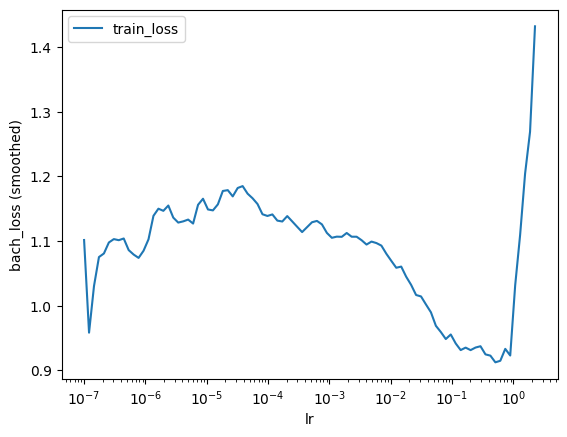

In [14]:
batch_size = 32
lr_finder = model.lr_finder(x_train, y_train, batch_size, tolerance=6)
_ = lr_finder.plot()

In [15]:
lr_finder.get_best_lr()

np.float64(0.050941380148164093)

In [16]:
model.optimizer.set_lr(0.01)

In [17]:
epochs = 50
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[0s / 0s],		train_loss: 0.9152,	val_loss: 0.5638
1:	[0s / 0s],		train_loss: 0.6329,	val_loss: 0.4661
2:	[0s / 0s],		train_loss: 0.5429,	val_loss: 0.4364
3:	[0s / 0s],		train_loss: 0.4704,	val_loss: 0.3993
4:	[0s / 0s],		train_loss: 0.5109,	val_loss: 0.4419
5:	[0s / 0s],		train_loss: 0.4014,	val_loss: 0.4348
6:	[0s / 0s],		train_loss: 0.4286,	val_loss: 0.4511
7:	[0s / 0s],		train_loss: 0.4375,	val_loss: 0.3619
8:	[0s / 0s],		train_loss: 0.3920,	val_loss: 0.4265
9:	[0s / 0s],		train_loss: 0.3922,	val_loss: 0.3671
10:	[0s / 0s],		train_loss: 0.3400,	val_loss: 0.3512
11:	[0s / 0s],		train_loss: 0.3102,	val_loss: 0.3790
12:	[0s / 0s],		train_loss: 0.3546,	val_loss: 0.3237
13:	[0s / 0s],		train_loss: 0.3156,	val_loss: 0.3475
14:	[0s / 0s],		train_loss: 0.3334,	val_loss: 0.3829
15:	[0s / 0s],		train_loss: 0.3377,	val_loss: 0.3511
16:	[0s / 0s],		train_loss: 0.2950,	val_loss: 0.4359
17:	[0s / 0s],		train_loss: 0.3588,	val_loss: 0.3094
18:	[0s / 0s],		train_loss: 0.3149,	val_loss: 0.3552
19:

/Users/simrantanwar/opt/anaconda3/envs/venv/lib/python3.9/site-packages/torchtuples/base.py:669: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch

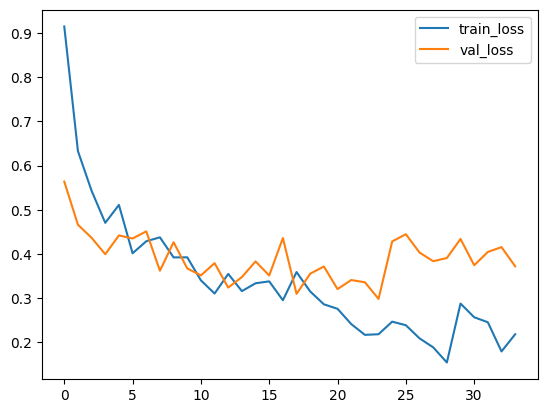

In [18]:
_ = log.plot()

# Prediction 

In [19]:
surv = model.predict_surv_df(x_test)

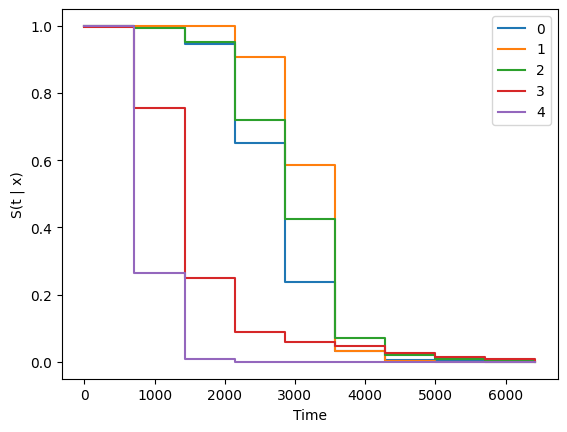

In [20]:
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [21]:
surv = model.interpolate(10).predict_surv_df(x_test)

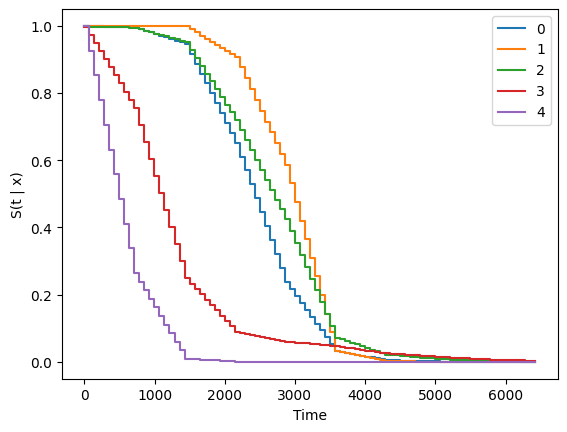

In [22]:
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

# Evaluation

In [23]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Concordance

In [24]:
ev.concordance_td('antolini')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.7871130764371447

# beier score

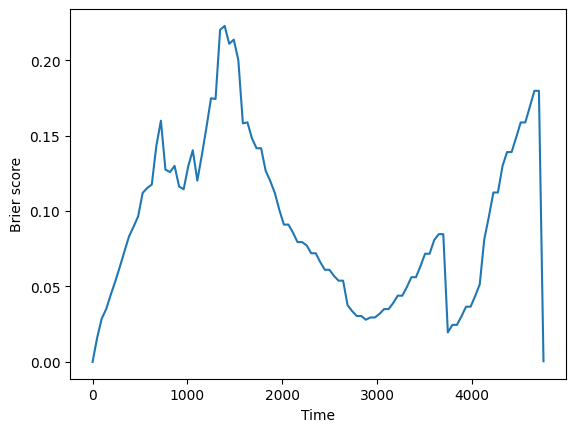

In [25]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev.brier_score(time_grid).plot()
plt.ylabel('Brier score')
_ = plt.xlabel('Time')

In [26]:
ev.integrated_brier_score(time_grid) 

np.float64(0.09398842633411852)

# Negatvie binominal log likelihood

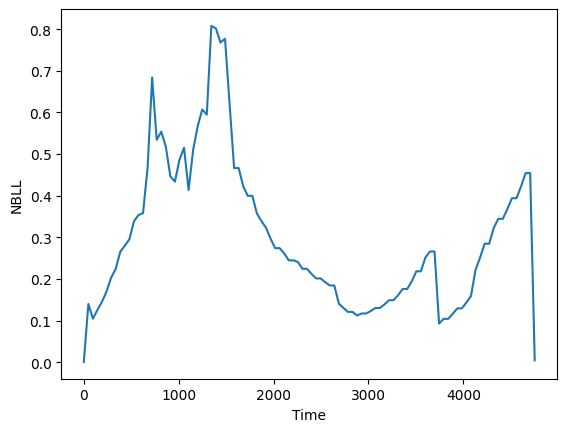

In [27]:
ev.nbll(time_grid).plot()
plt.ylabel('NBLL')
_ = plt.xlabel('Time')

In [28]:
ev.integrated_nbll(time_grid) 

np.float64(0.302718490192978)